## 6. Deep Learning for Texts and Sequences

In [1]:
# importing module
import sys
module='../modules'
if module not in sys.path: sys.path.append(module)
import myutils

In [2]:
# import
import numpy as np

In [3]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [4]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

### Using One-Hot encoder technique

In [5]:
word_index = {}
for sen in samples:
    for word in sen.split():
        if word not in word_index:
            word_index[word] = len(word_index)+1
word_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [6]:
max_len = 10 
onehot_samples = np.zeros((len(samples), max_len, len(word_index)+1))

for idx, sent in enumerate(samples):
    for j, word in list(enumerate(sent.split()))[:max_len]:
        onehot_samples[idx, j, word_index.get(word)] = 1
onehot_samples

array([[[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,

### Using Keras 

In [7]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

In [8]:
oneHot_results = tokenizer.texts_to_matrix(samples)
oneHot_results

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [9]:
# print word index in sentences
sequncers = tokenizer.texts_to_sequences(samples)
sequncers

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [10]:
# printing index
tokenizer.word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

### Using Word Embeddings

In [11]:
from keras.layers import Embedding, Dense
from keras.datasets import imdb
from keras import losses, metrics, optimizers, models, layers, preprocessing

In [12]:
max_features = 10000
maxlen = 20
# loading data
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=max_features)

In [13]:
# this will pad or truncate the data based on maximum length provided

train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

In [14]:
train_data.shape

(25000, 20)

In [15]:
train_data[:2]

array([[  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
         113,  103,   32,   15,   16, 5345,   19,  178,   32],
       [  23,    4, 1690,   15,   16,    4, 1355,    5,   28,    6,   52,
         154,  462,   33,   89,   78,  285,   16,  145,   95]], dtype=int32)

In [16]:
len(train_data[0])

20

In [17]:
# creating Embeddings Models
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

hist = model.fit(train_data, train_label,
                epochs=10,
                batch_size=32,
                validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 3s 126us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 124us/step - loss

In [18]:
history = hist.history
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
print("validation accuracy = ", np.mean(history['val_acc']))

validation accuracy =  0.73886


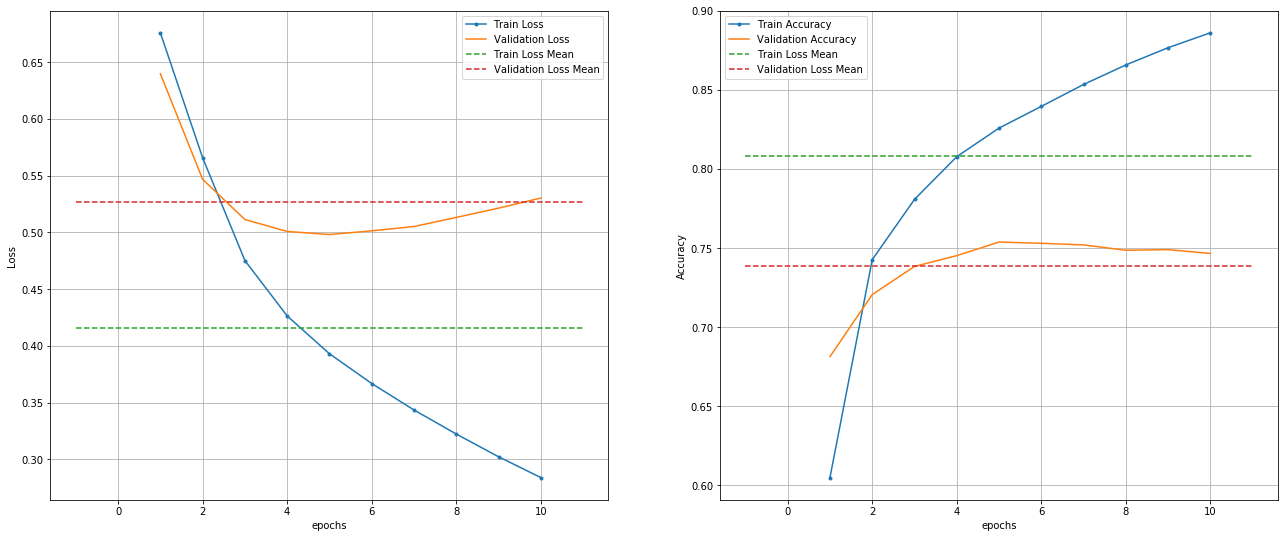

In [20]:
myutils.plot_keras_acc_ax(hist)

### Word2Vec 

In [22]:
path='../../datasets/imdb/test/'
data=[]
labels=[]

In [24]:
import os
os.listdir(path+'pos')

['4853_7.txt',
 '8637_10.txt',
 '799_7.txt',
 '2126_9.txt',
 '2443_10.txt',
 '8103_10.txt',
 '3939_7.txt',
 '67_10.txt',
 '12432_7.txt',
 '1755_10.txt',
 '11281_9.txt',
 '12387_8.txt',
 '7597_10.txt',
 '1204_8.txt',
 '6381_9.txt',
 '2104_10.txt',
 '11706_8.txt',
 '11543_10.txt',
 '922_8.txt',
 '2223_10.txt',
 '5678_10.txt',
 '11783_10.txt',
 '2049_10.txt',
 '7750_7.txt',
 '9300_9.txt',
 '2989_8.txt',
 '6383_10.txt',
 '3141_10.txt',
 '1856_7.txt',
 '4461_8.txt',
 '4397_7.txt',
 '5953_8.txt',
 '8656_7.txt',
 '2567_9.txt',
 '5355_10.txt',
 '4702_10.txt',
 '8208_7.txt',
 '6867_8.txt',
 '3549_8.txt',
 '4777_10.txt',
 '6130_9.txt',
 '10178_10.txt',
 '7833_9.txt',
 '6662_9.txt',
 '12147_10.txt',
 '8394_9.txt',
 '464_10.txt',
 '8841_9.txt',
 '6505_8.txt',
 '10512_9.txt',
 '7440_10.txt',
 '11115_7.txt',
 '2467_9.txt',
 '11197_7.txt',
 '5373_7.txt',
 '10908_8.txt',
 '8069_8.txt',
 '3458_9.txt',
 '11828_7.txt',
 '6973_7.txt',
 '9688_10.txt',
 '11040_8.txt',
 '3763_7.txt',
 '6982_10.txt',
 '6271_9

In [25]:
# Reading the Positive/Negative sentences

for label in ['pos', 'neg']:
    dir_name = os.path.join(path+label)
    for file in os.listdir(dir_name):
        with open(os.path.join(dir_name, file), encoding='utf8') as f:
            data.append(f.read())
            if label == 'pos':
                labels.append(1)
            else:
                labels.append(0)   

In [26]:
print(data[:2])
print(labels[:2])

["Well acted drama based on a novel by Arthur Miller. Something as simple as a pair of glasses becomes life altering. Lawrence Newman(William H. Macy)is a man that has chosen to be satisfied with his mundane life; the same job for twenty years and still living with his mother. He is told by his boss to correct his vision with a pair of glasses. Newman's life drastically changes and delves him into hell. The glasses he chose makes him look Jewish. He looses his job and becomes the object of heavy scrutiny by his Brooklyn neighborhood. Searching for a job, he encounters the attractive and outspoken Gertrude(Laura Dern), herself living with conflict because of her Jewish appearance. Soon the couple's new life together becomes a nightmare filled with humiliation and bigotry driven attacks. A very apt cast that features: Joseph Ziegler, Peter Oldring, Kay Hawtrey and of musical fame, Meat Loaf.", "Mullholland Drive proves once again that David Lynch is the Master of cinematic expression. At

In [27]:
# preprocessing the data
from keras.preprocessing.text import Tokenizer

In [28]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [29]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)

In [30]:
sequence = tokenizer.texts_to_sequences(data)

In [31]:
word_index = tokenizer.word_index
print("Unique words are : ", len(word_index))

Unique words are :  87393


In [32]:
from keras.preprocessing.sequence import pad_sequences

In [33]:
data = pad_sequences(sequence, maxlen=maxlen)
labels = np.asarray(labels)

In [34]:
print("Shape of data : ", data.shape)
print("Shape of labels : ", labels.shape)

Shape of data :  (25000, 100)
Shape of labels :  (25000,)


In [35]:
'''
# suffling the data 
data_labels = list(zip(data, labels))
np.random.shuffle(data_labels)

data1, labels1 = data_labels 
'''

'\n# suffling the data \ndata_labels = list(zip(data, labels))\nnp.random.shuffle(data_labels)\n\ndata1, labels1 = data_labels \n'

In [36]:
# for shuffling the data , best way to shuffle the indices of data
indices = np.arange(labels.shape[0])
np.random.shuffle(indices)

data1 = data[indices]
labels1 = labels[indices]

In [37]:
# splitting the data into train and test
x_train = data1[:training_samples]
y_train = labels1[:training_samples]
x_val = data1[training_samples: training_samples + validation_samples]   # validation data will have all the input data
y_val = labels1[training_samples: training_samples + validation_samples]

In [38]:
print(x_train.shape,  y_train.shape, x_val.shape, y_val.shape)

(200, 100) (200,) (10000, 100) (10000,)


#### Downloaded the glove pre-trained embeddings and loadded 

In [40]:
glove_dir='../../datasets/glove/'

glove_embed = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8') as fh:
    for line in fh:
        words = line.split()
        word = words[0]
        embed = np.asarray(words[1:], dtype='float32')
        glove_embed[word] = embed

In [41]:
print("Glove word embeddings: ", len(glove_embed))
#print("Glove word embeddings shaoe: ", len(glove_embed.values()[0]))

Glove word embeddings:  400000


In [42]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = glove_embed.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
print("Embedding Matrix Shape: ", embedding_matrix.shape)

Embedding Matrix Shape:  (10000, 100)


In [43]:
# building the model

model_glove = models.Sequential()
model_glove.add(layers.Embedding(input_dim=10000, output_dim=100, input_length=maxlen))
model_glove.add(layers.Flatten())
model_glove.add(Dense(32, activation='relu'))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### LOADING THE GLOVE EMBEDDINGS IN THE MODEL

In [44]:
model_glove.layers[0].set_weights([embedding_matrix])
model_glove.layers[0].trainable = False

In [45]:
model_glove.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [46]:
next(iter(glove_embed))

import sys
print(sys.version)

3.6.3 |Anaconda custom (64-bit)| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0]


In [47]:
from itertools import islice
print(list(islice(glove_embed.values(), 1)))

[array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.2

In [48]:
list(glove_embed.keys())[:2]

['the', ',']

In [49]:
len(glove_embed[list(glove_embed)[0]])

100

In [50]:
hist = model_glove.fit(x_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(x_val, y_val))

model_glove.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 1.6166 - acc: 0.5150 - val_loss: 0.8668 - val_acc: 0.5064
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5898 - acc: 0.6300 - val_loss: 0.8374 - val_acc: 0.5082
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4362 - acc: 0.7250 - val_loss: 0.7898 - val_acc: 0.5056
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3329 - acc: 0.8650 - val_loss: 1.2838 - val_acc: 0.4940
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2801 - acc: 0.8900 - val_loss: 0.7241 - val_acc: 0.5468
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1612 - acc: 0.9850 - val_loss: 0.8731 - val_acc: 0.5112
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3039 - acc: 0.8650 - val_loss: 0.7214 - val_acc: 0.5640
Epoch 8/10
200/200 [========

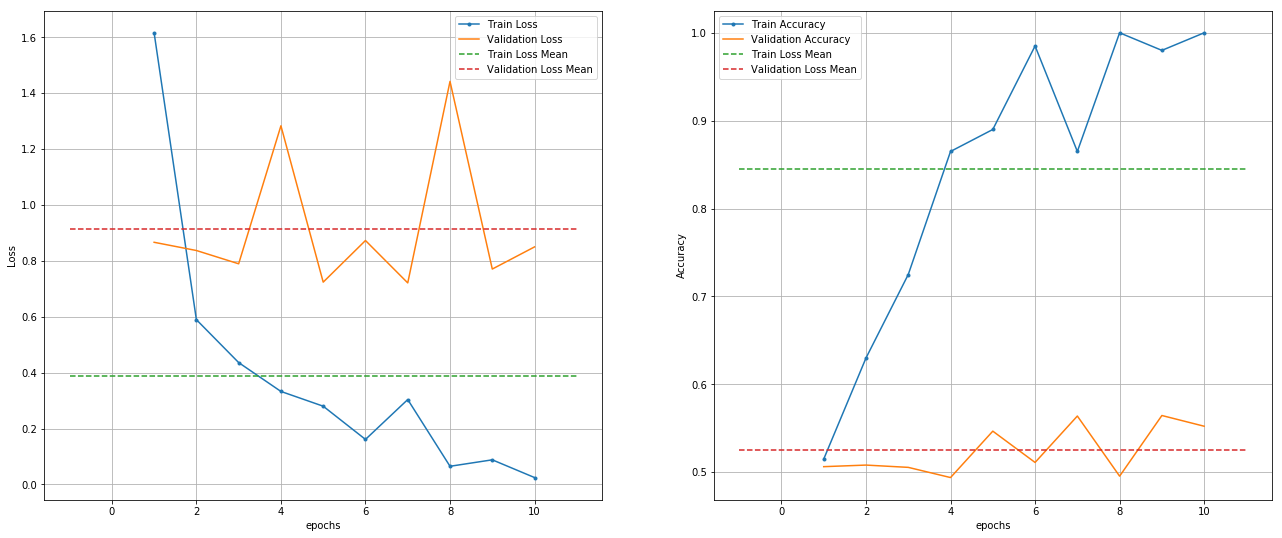

In [52]:
myutils.plot_keras_acc_ax(hist)